In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import cuda_cmm, math, hashlib

In [3]:
mu = 0.1
delta = 1e-3
cToC = 0.3
L = 1.0
sigma = 0.1
beta_naught = math.pi / 180.0 * 23 / 2

config_string = "{}-{}-{}-{}-{}-{}".format(mu, delta, cToC, L, sigma, beta_naught)
config_hash = hashlib.sha1(bytes(config_string, 'ascii')).hexdigest()

config_root = "./config/"

In [4]:
print("\nFR Data Generation")

vel_bound = 5e3

num_alphas = 2<<4
num_vels = 2<<8
num_As = 2<<4

# 2.3578
# 3.9254 
num_combos = num_alphas * num_vels * num_As
print("num_combos:", num_combos)

alphas = np.linspace(0.85*np.pi, 1/0.85*np.pi, num_alphas, dtype=np.float32)
vels = np.linspace(-4, 0, num_vels, dtype=np.float32)
As = np.linspace(-1, 1, num_As, dtype=np.float32)


vec = np.zeros((num_combos, 4), dtype=np.float32)

# print("Starting Vector loading")
ind = 0
for i, alpha in enumerate(alphas):
    for j, vel in enumerate(vels):
        for k, A in enumerate(As):

            ind = k + j * num_As + i * num_As * num_vels
            vec[ind, 0:3] = [vel, A, alpha]

print("Starting Cuda")
cuda_cmm.fr(vec, beta_naught, mu)


FR Data Generation
num_combos: 524288
Starting Cuda


In [5]:
fr_data = vec

In [6]:
fr_frame = pd.DataFrame(fr_data)
fr_frame.columns = ["vel", "A", "alpha", "fr"]

In [7]:
fr_frame.describe()

,vel,A,alpha,fr
count,524288.000000,524288.000000,524288.000000,524288.000000
mean,-2.000000,0.000000,3.183172,-0.833247
std,1.156959,0.595684,0.305478,1.114827
min,-4.000000,-1.000000,2.670354,-2.100859
25%,-3.000000,-0.500000,2.926763,-1.695096
50%,-2.000000,0.000000,3.183173,-1.460169
75%,-1.000000,0.500000,3.439582,0.485041
max,0.000000,1.000000,3.695991,1.302026


In [8]:
np.isfinite(fr_frame).all()

vel      True
A        True
alpha    True
fr       True
dtype: bool

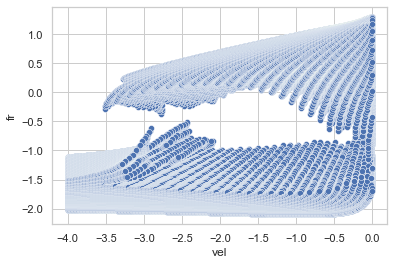

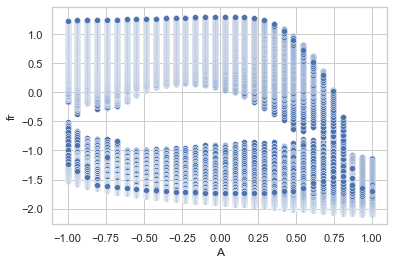

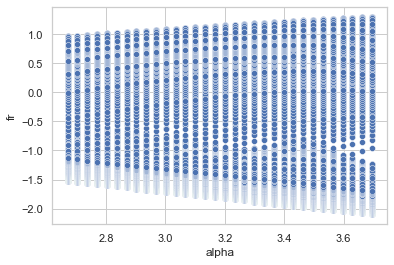

In [9]:
sns.set(style='whitegrid')
for input in ("vel", "A", "alpha"):
    for output in ("fr",):
        sns.scatterplot(x=input, y=output, data=fr_frame)
        plt.show()
# sns.scatterplot(x="A", y="dim_clamp_prim", data=mag_frame)

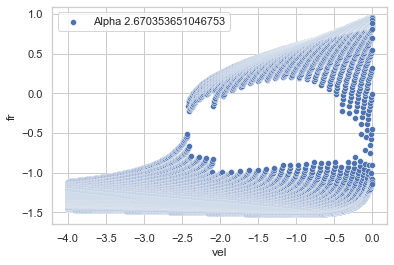

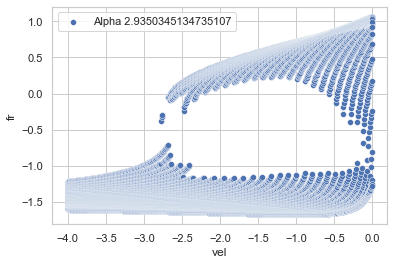

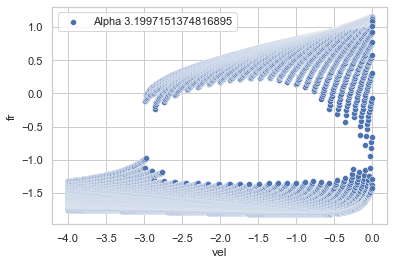

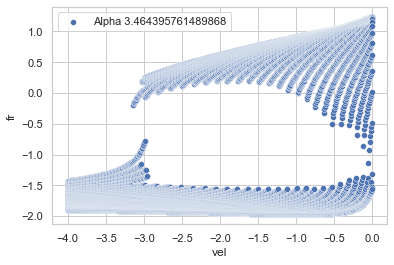

In [10]:
for alpha in fr_frame["alpha"].unique()[::8]:
    sns.scatterplot(x="vel", y="fr", data=fr_frame[fr_frame["alpha"] == alpha], label="Alpha {}".format(alpha))
    plt.show()

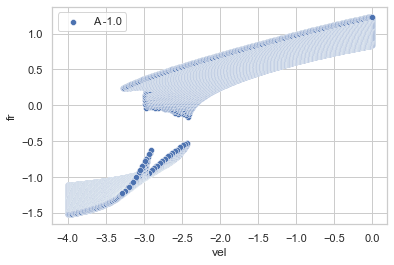

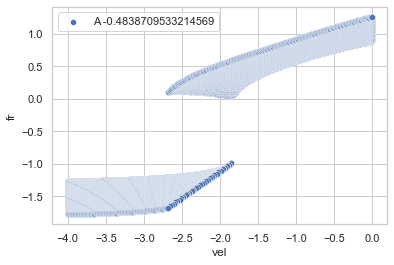

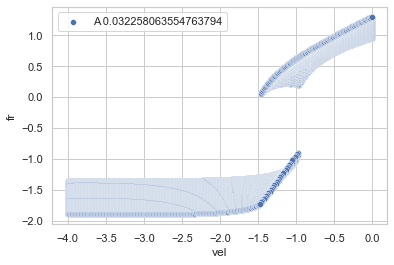

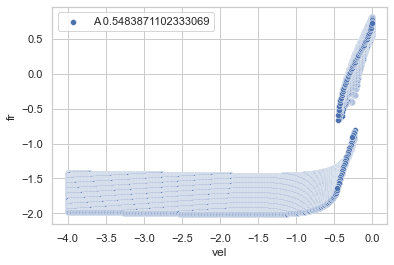

In [11]:
for A in fr_frame["A"].unique()[::8]:
    sns.scatterplot(x="vel", y="fr", data=fr_frame[fr_frame["A"] == A], label="A {}".format(A))
    plt.show()

In [12]:
nananananana = fr_frame[~np.isfinite(fr_frame["fr"])]

In [13]:
nananananana

,vel,A,alpha,fr


In [14]:
fr_frame[(fr_frame["A"].unique()[8] == fr_frame["A"]) & (np.abs(fr_frame["vel"] - (-1.5)) < 1.5) & (fr_frame["alpha"].unique()[8] == fr_frame["alpha"])].iloc[128]

vel     -1.996086
A       -0.483871
alpha    2.935035
fr       0.168922
Name: 139272, dtype: float32